# Fake News Detection




## Objective


The objective of this assignment is to develop a Semantic Classification model. You will be using Word2Vec method to extract the semantic relations from the text and develop a basic understanding of how to train supervised models to categorise text based on its meaning, rather than just syntax. You will explore how this technique is used in situations where understanding textual meaning plays a critical role in making accurate and efficient decisions.


## Business Objective

The spread of fake news has become a significant challenge in today’s digital world. With the massive volume of news articles published daily, it’s becoming harder to distinguish between credible and misleading information. This creates a need for systems that can automatically classify news articles as true or fake, helping to reduce misinformation and protect public trust.


In this assignment, you will develop a Semantic Classification model that uses the Word2Vec method to detect recurring patterns and themes in news articles. Using supervised learning models, the goal is to build a system that classifies news articles as either fake or true.


<h2> Pipelines that needs to be performed </h2>

You need to perform the following tasks to complete the assignment:

<ol type="1">

  <li> Data Preparation
  <li> Text Preprocessing
  <li> Train Validation Split
  <li> EDA on Training Data
  <li> EDA on Validation Data [Optional]
  <li> Feature Extraction
  <li> Model Training and Evaluation

</ol>

---

**NOTE:** The marks given along with headings and sub-headings are cumulative marks for those particular headings/sub-headings.<br>

The actual marks for each task are specified within the tasks themselves.

For example, marks given with heading *2* or sub-heading *2.1* are the cumulative marks, for your reference only. <br>

The marks you will receive for completing tasks are given with the tasks.

Suppose the marks for two tasks are: 3 marks for 2.1.1 and 2 marks for 3.2.2, or
* 2.1.1 [3 marks]
* 3.2.2 [2 marks]

then, you will earn 3 marks for completing task 2.1.1 and 2 marks for completing task 3.2.2.


---

## Data Dictionary


For this assignment, you will work with two datasets, `True.csv` and `Fake.csv`.
Both datasets contain three columns:
<ul>
  <li> title of the news article
  <li> text of the news article
  <li> date of article publication
</ul>

`True.csv` dataset includes 21,417 true news, while the `Fake.csv` dataset comprises 23,502 fake news.

## Installing required Libraries

In [1]:
!pip install --upgrade numpy==1.26.4
!pip install --upgrade pandas==2.2.2
!pip install --upgrade nltk==3.9.1
!pip install --upgrade spacy==3.7.5
!pip install --upgrade scipy==1.12
!pip install --upgrade pydantic==2.10.5
!pip install wordcloud==1.9.4
!python -m spacy download en_core_web_sm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 2.3 MB/s eta 0:00:0000:0100:01m
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


## Importing the necessary libraries

In [2]:
# Import essential libraries for data manipulation and analysis
import numpy as np  # For numerical operations and arrays
import pandas as pd  # For working with dataframes and structured data
import re  # For regular expression operations (text processing)
import nltk  # Natural Language Toolkit for text processing
import spacy  # For advanced NLP tasks
import string  # For handling string-related operations

# Optional: Uncomment the line below to enable GPU support for spaCy (if you have a compatible GPU)
#spacy.require_gpu()

# Load the spaCy small English language model
nlp = spacy.load("en_core_web_sm")

# For data visualization
import seaborn as sns  # Data visualization library for statistical graphics
import matplotlib.pyplot as plt  # Matplotlib for creating static plots
# Configure Matplotlib to display plots inline in Jupyter Notebook
%matplotlib inline

# Suppress unnecessary warnings to keep output clean
import warnings
warnings.filterwarnings('ignore')

# For interactive plots
from plotly.offline import plot  # Enables offline plotting with Plotly
import plotly.graph_objects as go  # For creating customizable Plotly plots
import plotly.express as px  # A high-level interface for Plotly

# For preprocessing and feature extraction in machine learning
from sklearn.feature_extraction.text import (  # Methods for text vectorization
    CountVectorizer,  # Converts text into a bag-of-words model
)

# Import accuracy, precision, recall, f_score from sklearn to predict train accuracy
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Pretty printing for better readability of output
from pprint import pprint

# For progress tracking in loops (useful for larger datasets)
from tqdm import tqdm, tqdm_notebook  # Progress bar for loops
tqdm.pandas()  # Enables progress bars for pandas operations

# Import textBlob
from textblob import TextBlob
 


In [36]:
## Change the display properties of pandas to max
# pd.set_option('display.max_colwidth', None)
# pd.set_option('display.max_columns', None)
# pd.set_option('display.max_rows', None)

## Load the data

Load the True.csv and Fake.csv files as DataFrames

In [70]:
# Import the first file - True.csv
true_df = pd.read_csv('True.csv',dtype='unicode')
# Import the second file - Fake.csv
fake_df = pd.read_csv('Fake.csv',dtype='unicode')

## **1.** Data Preparation  <font color = red>[10 marks]</font>





### **1.0** Data Understanding

In [72]:
# Inspect the DataFrame with True News to understand the given data
true_df.shape
true_df.head()


,title,text,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,"December 29, 2017"


In [ ]:
# Inspect the DataFrame with Fake News to understand the given data
fake_df.shape
fake_df.head()

In [68]:
# Print the column details for True News DataFrame
true_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21417 entries, 0 to 21416
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   title   21417 non-null  object
 1   text    21417 non-null  object
 2   date    21417 non-null  object
dtypes: object(3)
memory usage: 502.1+ KB


In [70]:
# Print the column details for Fake News Dataframe
fake_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23523 entries, 0 to 23522
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   title   23502 non-null  object
 1   text    23502 non-null  object
 2   date    23481 non-null  object
dtypes: object(3)
memory usage: 551.4+ KB


### **1.1** Add new column  <font color = red>[3 marks]</font> <br>

Add new column `news_label` to both the DataFrames and assign labels

In [72]:
# Print the column names of both DataFrames
pprint(true_df.columns)
pprint(fake_df.columns)

Index(['title', 'text', 'date'], dtype='object')
Index(['title', 'text', 'date'], dtype='object')


In [74]:
# Add a new column 'news_label' to the true news DataFrame and assign the label "1" to indicate that these news are true
true_df['news_label'] = 1
# Add a new column 'news_label' to the fake news DataFrame and assign the label "0" to indicate that these news are fake
fake_df['news_label'] = 0

### **1.2** Merge DataFrames  <font color = red>[2 marks]</font> <br>

Create a new Dataframe by merging True and Fake DataFrames

In [76]:
# Combine the true and fake news DataFrames into a single DataFrame
merged_df = pd.concat([true_df, fake_df])

In [78]:
# Display the first 5 rows of the combined DataFrame to verify the result
merged_df.shape
merged_df.head(5)

,title,text,date,news_label
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,"December 31, 2017",1
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,"December 29, 2017",1
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,"December 31, 2017",1
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,"December 30, 2017",1
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,"December 29, 2017",1


### **1.3** Handle the null values  <font color = red>[2 marks]</font> <br>

Check for null values and handle it by imputation or dropping the null values

In [80]:
# Check Presence of Null Value
null_counts = merged_df.isnull().sum()
print(null_counts)



title         21
text          21
date          42
news_label     0
dtype: int64


In [82]:
# Handle Rows with Null Values
# Remove Rows that have both title and text column as null
drop_index = merged_df[pd.isnull(merged_df['title']) & pd.isnull(merged_df['text'])].index
print(drop_index)
merged_df = merged_df.drop(drop_index,axis=0)
null_counts = merged_df.isnull().sum()
print(null_counts)



Index([ 9732, 12409, 13365, 17856, 19630, 21931, 21942, 21993, 22030, 22322,
       22368, 22418, 22531, 22730, 22741, 22792, 22829, 23121, 23167, 23217,
       23330],
      dtype='int64')
title          0
text           0
date          21
news_label     0
dtype: int64


### **1.4** Merge the relevant columns and drop the rest from the DataFrame  <font color = red>[3 marks]</font> <br>

Combine the relevant columns into a new column `news_text` and then drop irrelevant columns from the DataFrame

In [84]:
# Combine the relevant columns into a new column 'news_text' by joining their values with a space
merged_df['news_text'] = merged_df['title'].str.cat(merged_df['text'], sep=' ')
# Drop the irrelevant columns from the DataFrame as they are no longer needed
# Drop the irrelevant columns from the DataFrame as they are no longer needed (Date Column is not required) 
# (text and title columns have been merged to news_text are so are dropped)
merged_df = merged_df.drop('date', axis=1)
merged_df = merged_df.drop('title',axis=1)
merged_df = merged_df.drop('text',axis=1)
# Display the first 5 rows of the updated DataFrame to check the result
merged_df.head(5)

,news_label,news_text
0,1,"As U.S. budget fight looms, Republicans flip t..."
1,1,U.S. military to accept transgender recruits o...
2,1,Senior U.S. Republican senator: 'Let Mr. Muell...
3,1,FBI Russia probe helped by Australian diplomat...
4,1,Trump wants Postal Service to charge 'much mor...


## **2.** Text Preprocessing <font color = red>[15 marks]</font> <br>






On all the news text, you need to:
<ol type=1>
  <li> Make the text lowercase
  <li> Remove text in square brackets
  <li> Remove punctuation
  <li> Remove words containing numbers
</ol>


Once you have done these cleaning operations you need to perform POS tagging and lemmatization on the cleaned news text, and remove all words that are not tagged as NN or NNS.

### **2.1** Text Cleaning  <font color = red>[5 marks]</font> <br>



#### 2.1.0 Create a new DataFrame to store the processed data



In [86]:

# Create a DataFrame('df_clean') that will have only the cleaned news text and the lemmatized news text with POS tags removed
df_clean = pd.DataFrame()
df_clean = merged_df
df_clean


,news_label,news_text
0,1,"As U.S. budget fight looms, Republicans flip t..."
1,1,U.S. military to accept transgender recruits o...
2,1,Senior U.S. Republican senator: 'Let Mr. Muell...
3,1,FBI Russia probe helped by Australian diplomat...
4,1,Trump wants Postal Service to charge 'much mor...
...,...,...
23518,0,McPain: John McCain Furious That Iran Treated ...
23519,0,JUSTICE? Yahoo Settles E-mail Privacy Class-ac...
23520,0,Sunnistan: US and Allied ‘Safe Zone’ Plan to T...
23521,0,How to Blow $700 Million: Al Jazeera America F...


#### 2.1.1 Write the function to clean the text and remove all the unnecessary elements  <font color = red>[4 marks]</font> <br>



In [88]:
# Write the function here to clean the text and remove all the unnecessary elements

def clean_text(sent):
    # Convert to lower case
    sent = sent.lower() # Text to lowercase
    # Remove punctuation
    pattern = '[^\w\s]' # Removing punctuation
    sent = re.sub(pattern, '', sent) 
    # Remove words with numbers
    pattern = '\w*\d\w*' # Removing words with numbers in between
    sent = re.sub(pattern, '', sent)
    return sent

#### 2.1.2  Apply the function to clean the news text and store the cleaned text in a new column within the new DataFrame. <font color = red>[1 mark]</font> <br>


In [90]:
# Create a DataFrame('df_clean') that will have only the cleaned news text and the lemmatized news text with POS tags removed
# Apply the function to clean the news text and remove all unnecessary elements
# Store it in a separate column in the new DataFrame
df_clean['news_text_cleaned'] = pd.DataFrame(merged_df['news_text'].apply(clean_text))

# Add 'news_label' column to the new dataframe for topic identification
df_clean = df_clean.drop('news_text',axis=1)
df_clean

,news_label,news_text_cleaned
0,1,as us budget fight looms republicans flip thei...
1,1,us military to accept transgender recruits on ...
2,1,senior us republican senator let mr mueller do...
3,1,fbi russia probe helped by australian diplomat...
4,1,trump wants postal service to charge much more...
...,...,...
23518,0,mcpain john mccain furious that iran treated u...
23519,0,justice yahoo settles email privacy classactio...
23520,0,sunnistan us and allied safe zone plan to take...
23521,0,how to blow million al jazeera america finall...


### **2.2** POS Tagging and Lemmatization  <font color = red>[10 marks]</font> <br>



#### 2.2.1 Write the function for POS tagging and lemmatization, filtering stopwords and keeping only NN and NNS tags <font color = red>[8 marks]</font> <br>



In [91]:
# Write the function for POS tagging and lemmatization, filtering stopwords and keeping only NN and NNS tags
#Write your function to Lemmatize the texts
def lemmmatize_text(text):
    sent = []
    doc = nlp(text)
    for token in doc:
        sent.append(token.lemma_)
    return " ".join(sent)



In [92]:
df_clean['news_text_lemmatized'] = df_clean['news_text_cleaned'].apply(lemmmatize_text)
df_clean

,news_label,news_text_cleaned,news_text_lemmatized
0,1,as us budget fight looms republicans flip thei...,as we budget fight loom republicans flip their...
1,1,us military to accept transgender recruits on ...,we military to accept transgender recruit on m...
2,1,senior us republican senator let mr mueller do...,senior us republican senator let mr mueller do...
3,1,fbi russia probe helped by australian diplomat...,fbi russia probe help by australian diplomat t...
4,1,trump wants postal service to charge much more...,trump want postal service to charge much more ...
...,...,...,...
23518,0,mcpain john mccain furious that iran treated u...,mcpain john mccain furious that iran treat we ...
23519,0,justice yahoo settles email privacy classactio...,justice yahoo settle email privacy classaction...
23520,0,sunnistan us and allied safe zone plan to take...,sunnistan we and ally safe zone plan to take t...
23521,0,how to blow million al jazeera america finall...,how to blow million al jazeera america final...


In [96]:
## Recommended to perform the below steps to save time while rerunning the code
df_clean.to_csv("news_text_lemmatized_.csv", index=False)

In [5]:
df_clean = pd.read_csv('news_text_lemmatized_.csv',dtype='unicode')
df_clean

,news_label,news_text_cleaned,news_text_lemmatized
0,1,as us budget fight looms republicans flip thei...,as we budget fight loom republicans flip their...
1,1,us military to accept transgender recruits on ...,we military to accept transgender recruit on m...
2,1,senior us republican senator let mr mueller do...,senior us republican senator let mr mueller do...
3,1,fbi russia probe helped by australian diplomat...,fbi russia probe help by australian diplomat t...
4,1,trump wants postal service to charge much more...,trump want postal service to charge much more ...
...,...,...,...
44909,0,mcpain john mccain furious that iran treated u...,mcpain john mccain furious that iran treat we ...
44910,0,justice yahoo settles email privacy classactio...,justice yahoo settle email privacy classaction...
44911,0,sunnistan us and allied safe zone plan to take...,sunnistan we and ally safe zone plan to take t...
44912,0,how to blow million al jazeera america finall...,how to blow million al jazeera america final...


#### 2.2.2  Apply the POS tagging and lemmatization function to cleaned text and store it in a new column within the new DataFrame. <font color = red>[2 mark]</font> <br>

**NOTE: Store the cleaned text and the lemmatized text with POS tags removed in separate columns within the new DataFrame.**

**This will be useful for analysing character length differences between cleaned text and lemmatized text with POS tags removed during EDA.**


In [7]:
#Write your function to extract the POS tags 

def pos_tag(text):
    sent = []
    blob = TextBlob(text)
    sent = [word for (word,tag) in blob.tags if tag=='NN']
    return " ".join(sent)



In [9]:
df_clean["news_text__POS_removed"] =  df_clean['news_text_lemmatized'].apply(pos_tag)
df_clean

,news_label,news_text_cleaned,news_text_lemmatized,news_text__POS_removed
0,1,as us budget fight looms republicans flip thei...,as we budget fight loom republicans flip their...,budget fight loom script washington reuter hea...
1,1,us military to accept transgender recruits on ...,we military to accept transgender recruit on m...,transgender recruit monday washington time sta...
2,1,senior us republican senator let mr mueller do...,senior us republican senator let mr mueller do...,senator job washington reuter counsel investig...
3,1,fbi russia probe helped by australian diplomat...,fbi russia probe help by australian diplomat t...,fbi russia probe help diplomat tipoff washingt...
4,1,trump wants postal service to charge much more...,trump want postal service to charge much more ...,trump service amazon president call service fr...
...,...,...,...,...
44909,0,mcpain john mccain furious that iran treated u...,mcpain john mccain furious that iran treat we ...,mcpain john treat century report week mishap v...
44910,0,justice yahoo settles email privacy classactio...,justice yahoo settle email privacy classaction...,justice yahoo privacy classaction lawyer centu...
44911,0,sunnistan us and allied safe zone plan to take...,sunnistan we and ally safe zone plan to take t...,sunnistan zone plan booty century wireremember...
44912,0,how to blow million al jazeera america finall...,how to blow million al jazeera america final...,al jazeera century jazeera america history fai...


In [11]:
## Recommended to perform the below steps to save time while rerunning the code
df_clean.to_csv("news_text_lemmatized_POS.csv", index=False)

### Save the Cleaned data as a csv file (Recommended)

In [3]:
## Recommended to perform the below steps to save time while rerunning the code
df_clean = pd.read_csv('news_text_lemmatized_POS.csv',dtype='unicode')


In [12]:
# Check the first few rows of the DataFrame
df_clean.head(10)

,news_label,news_text_cleaned,news_text_lemmatized,news_text__POS_removed
0,1,as us budget fight looms republicans flip thei...,as we budget fight loom republicans flip their...,budget fight loom script washington reuter hea...
1,1,us military to accept transgender recruits on ...,we military to accept transgender recruit on m...,transgender recruit monday washington time sta...
2,1,senior us republican senator let mr mueller do...,senior us republican senator let mr mueller do...,senator job washington reuter counsel investig...
3,1,fbi russia probe helped by australian diplomat...,fbi russia probe help by australian diplomat t...,fbi russia probe help diplomat tipoff washingt...
4,1,trump wants postal service to charge much more...,trump want postal service to charge much more ...,trump service amazon president call service fr...
5,1,white house congress prepare for talks on spen...,white house congress prepare for talk on spend...,house congress prepare talk spend immigration ...
6,1,trump says russia probe will be fair but timel...,trump say russia probe will be fair but timeli...,russia probe nyt beach reuter president thursd...
7,1,factbox trump on twitter dec approval rating...,factbox trump on twitter dec approval ratin...,trump twitter dec approval rating statement tw...
8,1,trump on twitter dec global warming the foll...,trump on twitter dec global warming the fol...,trump twitter dec statement twitter account pr...
9,1,alabama official to certify senatorelect jones...,alabama official to certify senatorelect jones...,official today challenge washington secretary ...


In [18]:
# Check the dimensions of the DataFrame
df_clean.size

179656

In [20]:
# Check the number of non-null entries and data types of each column
df_clean.isnull().sum()
df_clean.info()
print(df_clean.dtypes)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44914 entries, 0 to 44913
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   news_label              44914 non-null  object
 1   news_text_cleaned       44914 non-null  object
 2   news_text_lemmatized    44914 non-null  object
 3   news_text__POS_removed  44905 non-null  object
dtypes: object(4)
memory usage: 1.4+ MB
news_label                object
news_text_cleaned         object
news_text_lemmatized      object
news_text__POS_removed    object
dtype: object


## **3.** Train Validation Split <font color = red>[5 marks]</font> <br>

In [22]:
# Import Train Test Split and split the DataFrame into 70% train and 30% validation data
# Import Train Test Split and split the DataFrame into 70% train and 30% validation data
from sklearn.model_selection import train_test_split

df_clean.isnull().sum()
df_clean = df_clean.dropna()
df_clean.isnull().sum()

# Assuming df is your full preprocessed DataFrame
train_df, val_df = train_test_split(df_clean, test_size=0.3, random_state=42)

# Optional: Check sizes
print("Train shape:", train_df.shape)
print("Validation shape:", val_df.shape)

Train shape: (31433, 4)
Validation shape: (13472, 4)


## **4.** Exploratory Data Analysis on Training Data  <font color = red>[40 marks]</font> <br>

Perform EDA on cleaned and preprocessed texts to get familiar with the training data by performing the tasks given below:

<ul>
  <li> Visualise the training data according to the character length of cleaned news text and lemmatized news text with POS tags removed
  <li> Using a word cloud, find the top 40 words by frequency in true and fake news separately
  <li> Find the top unigrams, bigrams and trigrams by frequency in true and fake news separately
</ul>





### **4.1** Visualise character lengths of cleaned news text and lemmatized news text with POS tags removed  <font color = red>[10 marks]</font> <br>



##### 4.1.1  Add new columns to calculate the character lengths of the processed data columns  <font color = red>[3 marks]</font> <br>



In [24]:
# Add a new column to calculate the character length of cleaned news text
df_clean['news_text_cleaned_length'] = [len(each_sent) for each_sent in df_clean['news_text_cleaned']]
df_clean['news_text_lemmatized_length'] = [len(each_lem_sent) for each_lem_sent in df_clean['news_text_lemmatized']]
df_clean['POS_removed_length'] = [len(each_pos_sent) for each_pos_sent in map(str,df_clean['news_text__POS_removed'])]
df_clean


,news_label,news_text_cleaned,news_text_lemmatized,news_text__POS_removed,news_text_cleaned_length,news_text_lemmatized_length,POS_removed_length
0,1,as us budget fight looms republicans flip thei...,as we budget fight loom republicans flip their...,budget fight loom script washington reuter hea...,4536,4404,1644
1,1,us military to accept transgender recruits on ...,we military to accept transgender recruit on m...,transgender recruit monday washington time sta...,4022,3869,1660
2,1,senior us republican senator let mr mueller do...,senior us republican senator let mr mueller do...,senator job washington reuter counsel investig...,2771,2692,1096
3,1,fbi russia probe helped by australian diplomat...,fbi russia probe help by australian diplomat t...,fbi russia probe help diplomat tipoff washingt...,2446,2347,980
4,1,trump wants postal service to charge much more...,trump want postal service to charge much more ...,trump service amazon president call service fr...,5056,4901,1972
...,...,...,...,...,...,...,...
44909,0,mcpain john mccain furious that iran treated u...,mcpain john mccain furious that iran treat we ...,mcpain john treat century report week mishap v...,3216,3113,1170
44910,0,justice yahoo settles email privacy classactio...,justice yahoo settle email privacy classaction...,justice yahoo privacy classaction lawyer centu...,1698,1639,675
44911,0,sunnistan us and allied safe zone plan to take...,sunnistan we and ally safe zone plan to take t...,sunnistan zone plan booty century wireremember...,24480,23899,8086
44912,0,how to blow million al jazeera america finall...,how to blow million al jazeera america final...,al jazeera century jazeera america history fai...,2585,2532,962


##### 4.1.2  Create Histogram to visualise character lengths  <font color = red>[7 marks]</font> <br>

 Plot both distributions on the same graph for comparison and to observe overlaps and peak differences to understand text preprocessing's impact on text length.

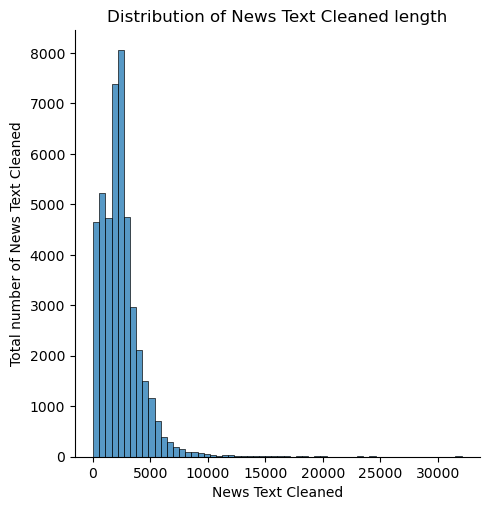

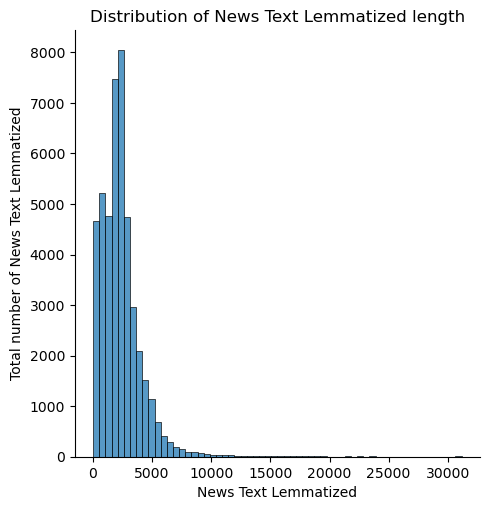

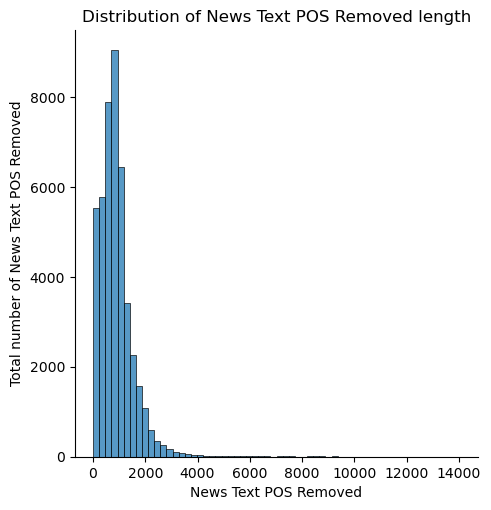

In [26]:
# Create a histogram plot to visualise character lengths
sns.displot(df_clean['news_text_cleaned_length'], kind='hist', bins=60)
plt.xlabel("News Text Cleaned")
plt.ylabel("Total number of News Text Cleaned")
plt.title("Distribution of News Text Cleaned length")
plt.show()

# Add histogram for cleaned news text
sns.displot(df_clean['news_text_lemmatized_length'], kind='hist', bins=60)
plt.xlabel("News Text Lemmatized")
plt.ylabel("Total number of News Text Lemmatized")
plt.title("Distribution of News Text Lemmatized length")
plt.show()

# Add histogram for lemmatized news text with POS tags removed
sns.displot(df_clean['POS_removed_length'], kind='hist', bins=60)
plt.xlabel("News Text POS Removed")
plt.ylabel("Total number of News Text POS Removed")
plt.title("Distribution of News Text POS Removed length")
plt.show()


### **4.2** Find and display the top 40 words by frequency among true and fake news in Training data after processing the text  <font color = red>[10 marks]</font> <br>



##### 4.2.1 Find and display the top 40 words by frequency among true news in Training data after processing the text  <font color = red>[5 marks]</font> <br>

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/I326944/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


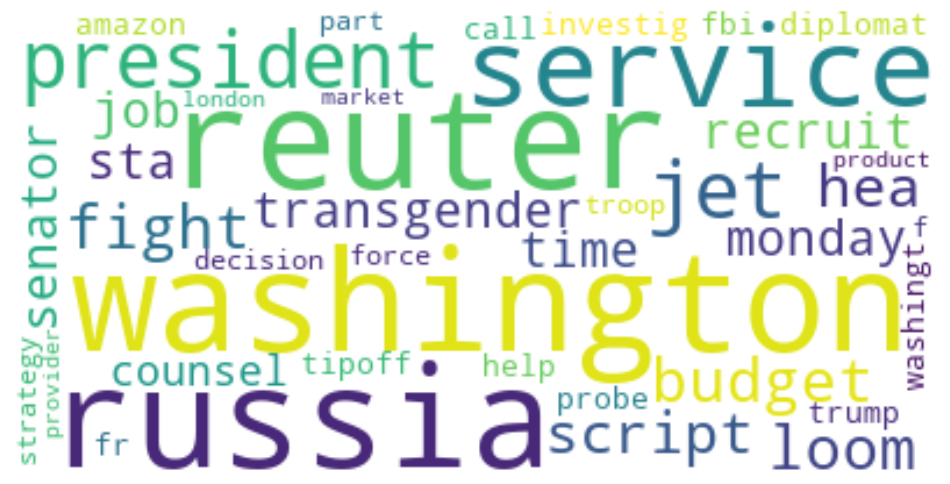

In [49]:
## Use a word cloud find the top 40 words by frequency among true news in the training data after processing the text

from nltk.corpus import stopwords
from wordcloud import WordCloud
nltk.download('stopwords')
stopwords = set(stopwords.words('english'))

# Filter for true news
true_df = df_clean[df_clean['news_label'] == '1']

# Generate word cloud for true news
wordcloud = WordCloud(max_font_size=60, max_words=40, 
                      background_color="white", random_state=100, 
                      stopwords=stopwords).generate(str(true_df['news_text__POS_removed']))
plt.figure(figsize=[12,12])
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()



##### 4.2.2 Find and display the top 40 words by frequency among fake news in Training data after processing the text  <font color = red>[5 marks]</font> <br>

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/I326944/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


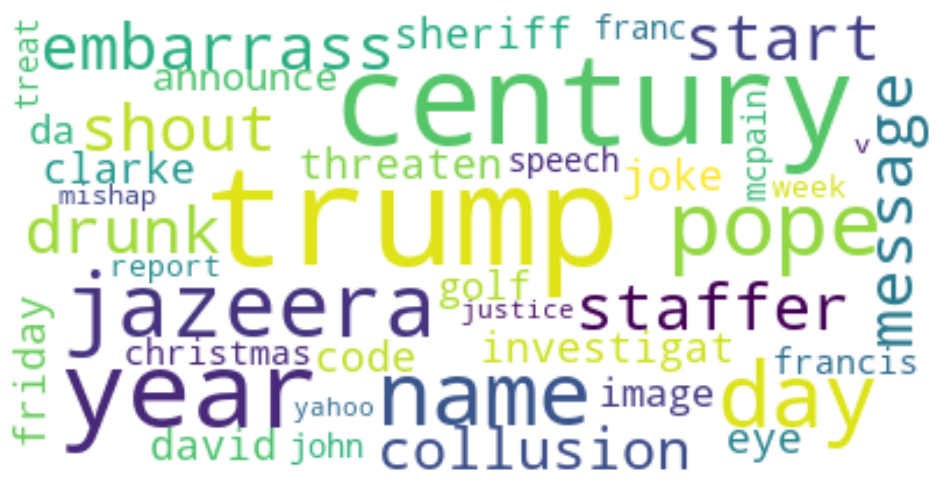

In [51]:
## Use a word cloud find the top 40 words by frequency among fake news in the training data after processing the text

from nltk.corpus import stopwords
from wordcloud import WordCloud
nltk.download('stopwords')
stopwords = set(stopwords.words('english'))

# Filter for fake news
fake_df = df_clean[df_clean['news_label'] == '0']
# Generate word cloud for fake news

wordcloud = WordCloud(max_font_size=60, max_words=40, 
                      background_color="white", random_state=100, 
                      stopwords=stopwords).generate(str(fake_df['news_text__POS_removed']))
plt.figure(figsize=[12,12])
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()


### **4.3** Find and display the top unigrams, bigrams and trigrams by frequency in true news and fake news after processing the text  <font color = red>[20 marks]</font> <br>




##### 4.3.1 Write a function to get the specified top n-grams  <font color = red>[4 marks]</font> <br>



In [53]:
# Write a function to get the specified top n-grams
# Creating a function to extract top ngrams(unigram/bigram/trigram) based on the function inputs
def get_top_ngrams(text, n=None, ngram=(1,1)):
  vec = CountVectorizer(stop_words='english', ngram_range=ngram).fit(text)
  bagofwords = vec.transform(text)
  sum_words = bagofwords.sum(axis=0)
  words_frequency = [(word, sum_words[0, index]) for word, index in vec.vocabulary_.items()]
  words_frequency = sorted(words_frequency, key = lambda x: x[1], reverse=True)
  return words_frequency[:n]

##### 4.3.2 Handle the NaN values  <font color = red>[1 mark]</font> <br>



In [55]:
# Handle NaN values in the text data
#Removing -PRON- from the text corpus
df_clean['POS_clean'] = df_clean['news_text__POS_removed'].str.replace('-PRON-', '')
df_clean_true = df_clean[df_clean['news_label'] == '1']
df_clean_false = df_clean[df_clean['news_label'] == '0']

### For True News




##### 4.3.3 Display the top 10 unigrams by frequency in true news and plot them as a bar graph  <font color = red>[2.5 marks]</font> <br>

In [57]:
# Print the top 10 unigrams by frequency in true news and plot the same using a bar graph
top_10words = get_top_ngrams(df_clean_true['POS_clean'].values.astype('U'), n=10, ngram=(1,1))
df_unigram_true = pd.DataFrame(top_10words, columns=['unigram', 'count'])
df_unigram_true


,unigram,count
0,trump,35036
1,president,27484
2,state,24647
3,government,19875
4,year,18962
5,house,18419
6,election,14482
7,party,14378
8,country,13794
9,campaign,11938


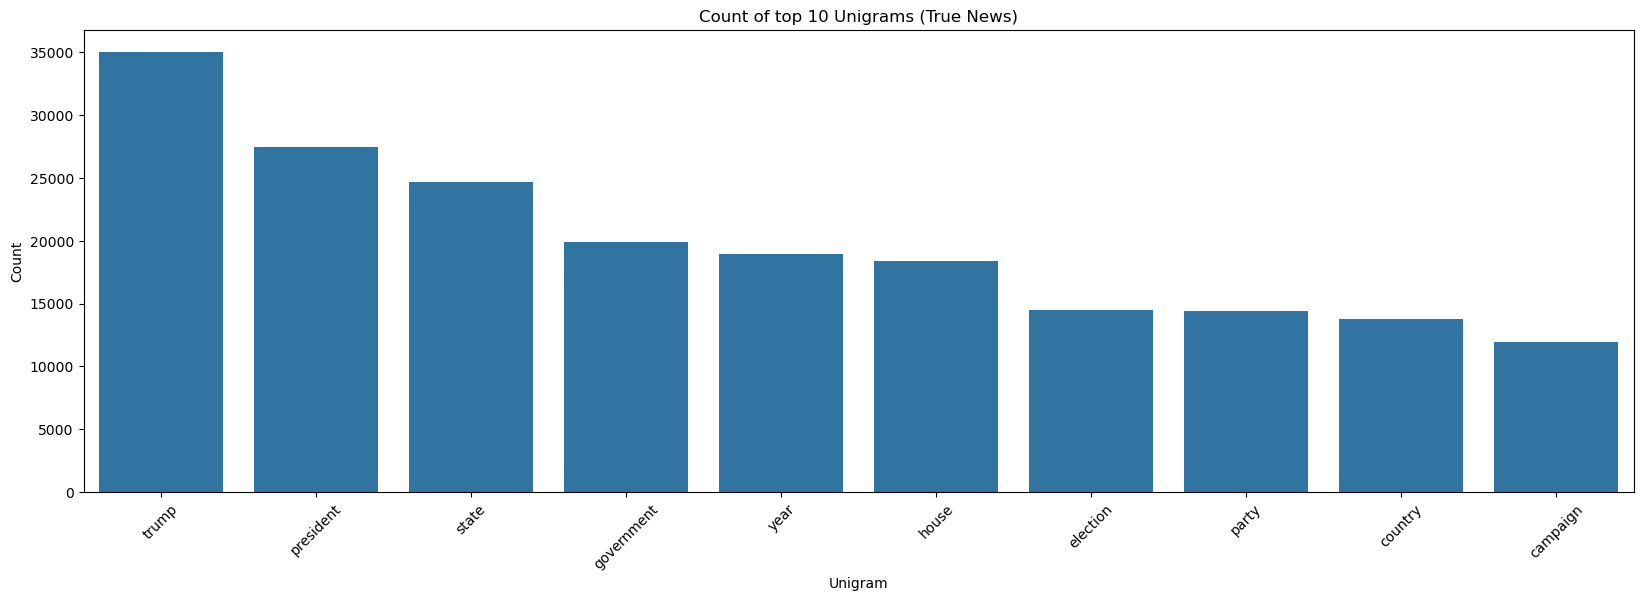

In [59]:
# Plotting the unigram of true news
plt.figure(figsize=[20,6])
sns.barplot(x=df_unigram_true['unigram'], y=df_unigram_true['count'])
plt.xticks(rotation=45)
plt.xlabel("Unigram")
plt.ylabel("Count")
plt.title("Count of top 10 Unigrams (True News)")
plt.show()

##### 4.3.4 Display the top 10 bigrams by frequency in true news and plot them as a bar graph  <font color = red>[2.5 marks]</font> <br>



In [61]:
# Print the top 10 bigrams by frequency in true news and plot the same using a bar graph
top_10words = get_top_ngrams(df_clean_true['POS_clean'].values.astype('U'), n=10, ngram=(2,2))
df_bigram_true = pd.DataFrame(top_10words, columns=['bigram', 'count'])
df_bigram_true

,bigram,count
0,president barack,2737
1,secretary state,2321
2,president trump,1922
3,state department,1919
4,donald trump,1747
5,barack obama,1725
6,trump administration,1671
7,news conference,1435
8,trump campaign,1372
9,vice president,1274


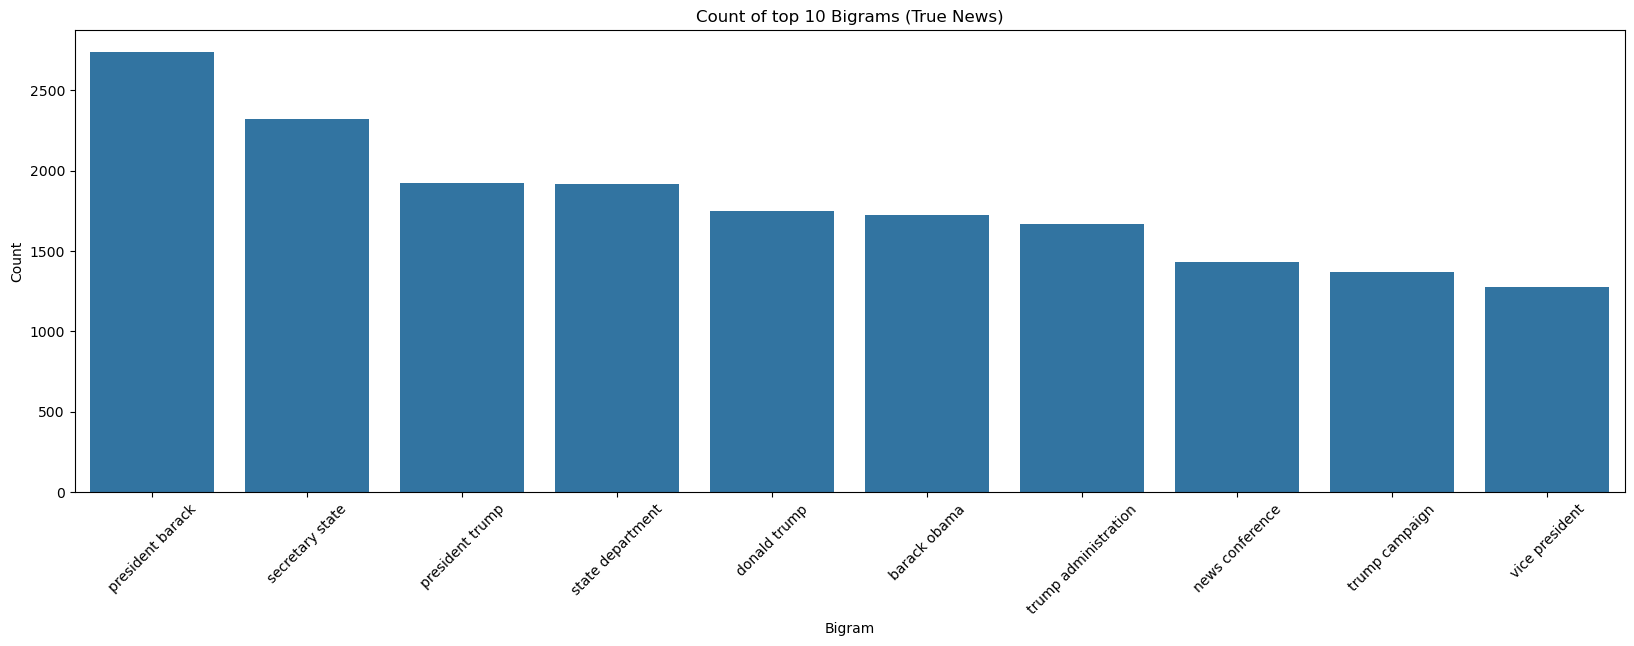

In [62]:
# Plotting the bigrams of True News
plt.figure(figsize=[20,6])
sns.barplot(x=df_bigram_true['bigram'], y=df_bigram_true['count'])
plt.xticks(rotation=45)
plt.xlabel("Bigram")
plt.ylabel("Count")
plt.title("Count of top 10 Bigrams (True News)")
plt.show()

##### 4.3.5 Display the top 10 trigrams by frequency in true news and plot them as a bar graph  <font color = red>[2.5 marks]</font> <br>



In [64]:
# Print the top 10 trigrams by frequency in true news and plot the same using a bar graph
top_10words = get_top_ngrams(df_clean_true['POS_clean'].values.astype('U'), n=10, ngram=(3,3))
df_trigram_true = pd.DataFrame(top_10words, columns=['trigram', 'count'])
df_trigram_true

,trigram,count
0,president barack obama,1429
1,house speaker paul,578
2,president vladimir putin,551
3,secretary state rex,505
4,state rex tillerson,491
5,majority leader mitch,444
6,leader mitch mcconnell,359
7,speaker paul ryan,357
8,vice president pence,348
9,washington president trump,342


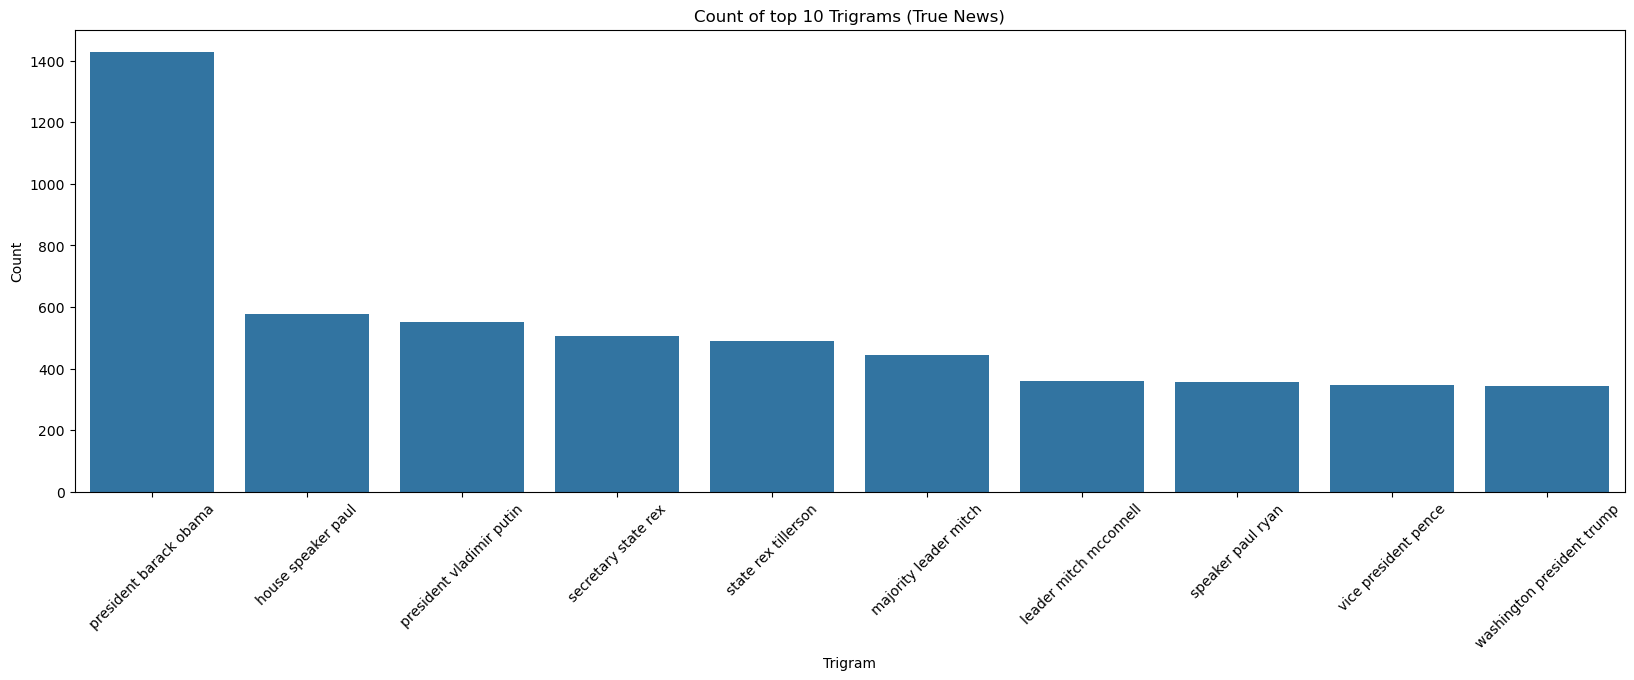

In [67]:
# Plotting the trigrams of True News
plt.figure(figsize=[20,6])
sns.barplot(x=df_trigram_true['trigram'], y=df_trigram_true['count'])
plt.xticks(rotation=45)
plt.xlabel("Trigram")
plt.ylabel("Count")
plt.title("Count of top 10 Trigrams (True News)")
plt.show()

### For Fake News







##### 4.3.6 Display the top 10 unigrams by frequency in fake news and plot them as a bar graph  <font color = red>[2.5 marks]</font> <br>

In [71]:
# Print the top 10 unigrams by frequency in fake news and plot the same using a bar graph
top_10words = get_top_ngrams(df_clean_false['POS_clean'].values.astype('U'), n=10, ngram=(1,1))
df_unigram_false = pd.DataFrame(top_10words, columns=['unigram', 'count'])
df_unigram_false

,unigram,count
0,trump,62523
1,president,27161
2,clinton,17868
3,state,17851
4,time,16208
5,year,15030
6,news,14881
7,video,14669
8,image,14165
9,campaign,11855


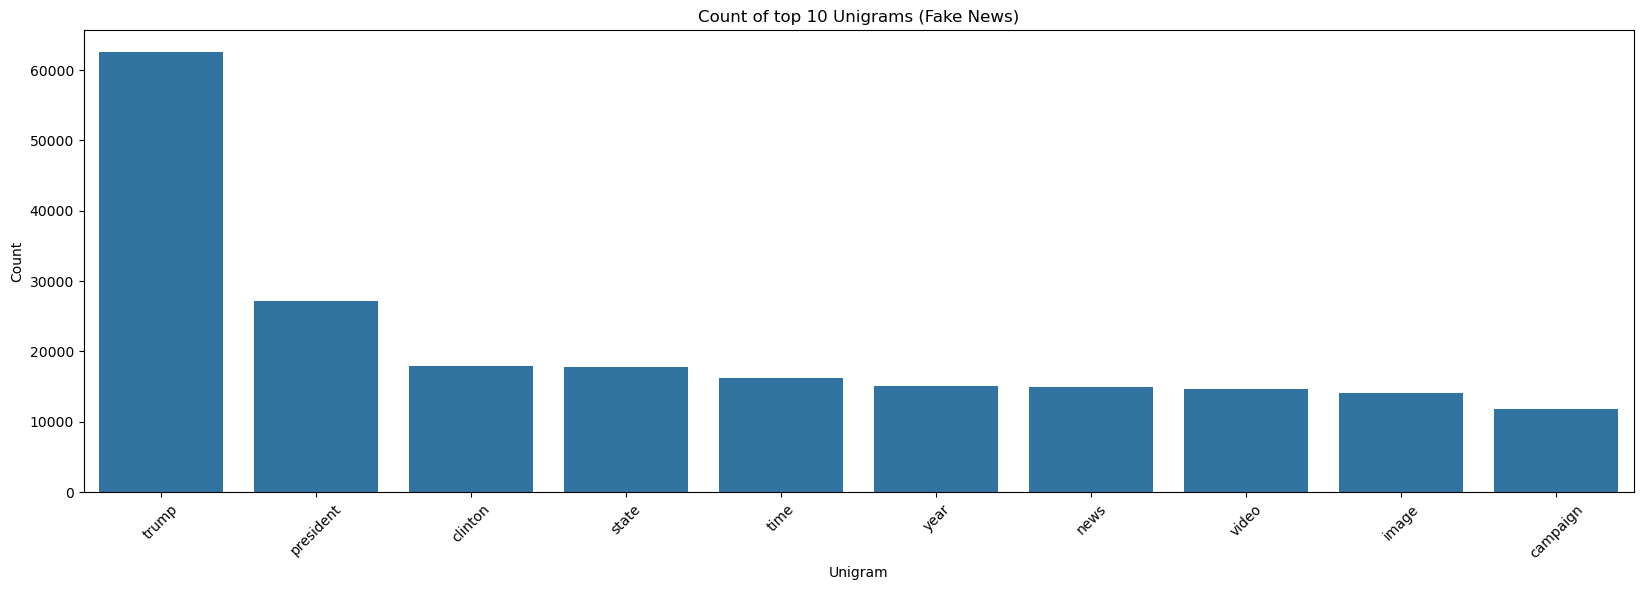

In [37]:
# Plotting the unigram of fake news
plt.figure(figsize=[20,6])
sns.barplot(x=df_unigram_false['unigram'], y=df_unigram_false['count'])
plt.xticks(rotation=45)
plt.xlabel("Unigram")
plt.ylabel("Count")
plt.title("Count of top 10 Unigrams (Fake News)")
plt.show()

##### 4.3.7 Display the top 10 bigrams by frequency in fake news and plot them as a bar graph  <font color = red>[2.5 marks]</font> <br>



In [73]:
# Print the top 10 bigrams by frequency in fake news and plot the same using a bar graph
top_10words = get_top_ngrams(df_clean_false['POS_clean'].values.astype('U'), n=10, ngram=(2,2))
df_bigram_false = pd.DataFrame(top_10words, columns=['bigram', 'count'])
df_bigram_false

,bigram,count
0,donald trump,5212
1,president trump,3691
2,trump campaign,1986
3,trump supporter,1972
4,barack obama,1706
5,president obama,1638
6,century wire,1609
7,secretary state,1587
8,state department,1572
9,trump realdonaldtrump,1532


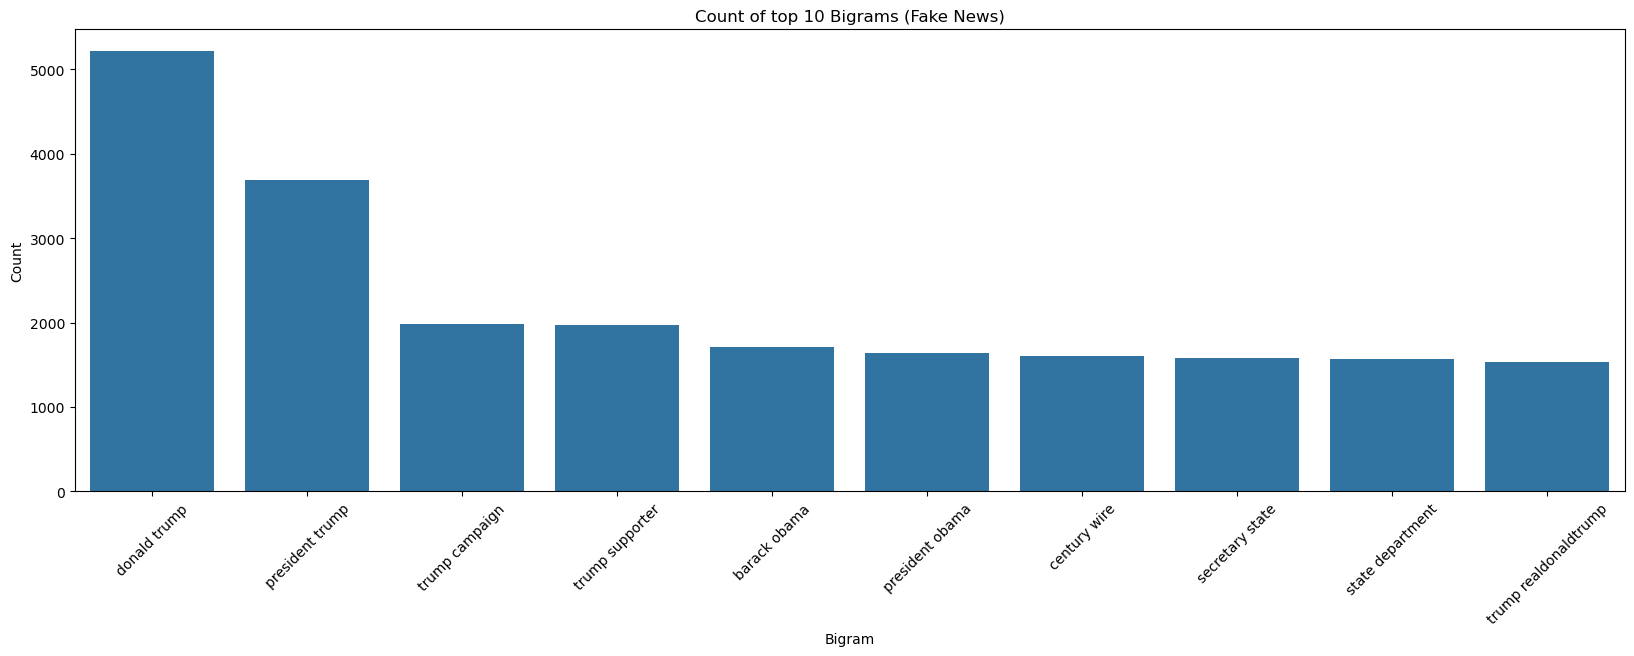

In [75]:
# Plotting the bigrams of False News
plt.figure(figsize=[20,6])
sns.barplot(x=df_bigram_false['bigram'], y=df_bigram_false['count'])
plt.xticks(rotation=45)
plt.xlabel("Bigram")
plt.ylabel("Count")
plt.title("Count of top 10 Bigrams (Fake News)")
plt.show()

##### 4.3.8 Display the top 10 trigrams by frequency in fake news and plot them as a bar graph  <font color = red>[2.5 marks]</font> <br>



In [79]:
# Print the top 10 trigrams by frequency in fake news and plot the same using a bar graph
top_10words = get_top_ngrams(df_clean_false['POS_clean'].values.astype('U'), n=10, ngram=(3,3))
df_trigram_false = pd.DataFrame(top_10words, columns=['trigram', 'count'])
df_trigram_false

,trigram,count
0,news century wire,941
1,donald trump realdonaldtrump,862
2,president barack obama,698
3,image video screen,599
4,video screen capture,563
5,department homeland security,301
6,secretary state clinton,259
7,image chip image,256
8,house press secretary,243
9,broadcast boiler room,215


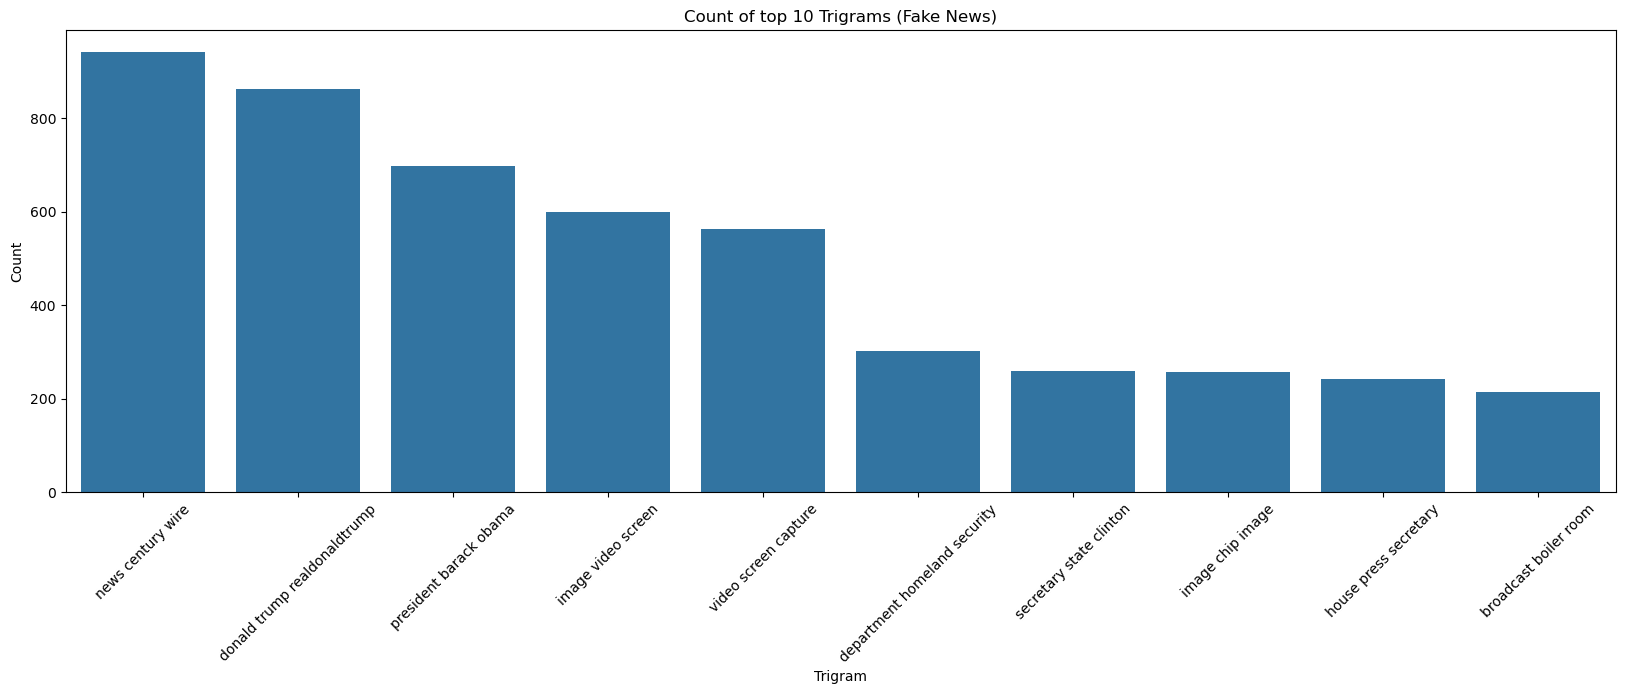

In [81]:
plt.figure(figsize=[20,6])
sns.barplot(x=df_trigram_false['trigram'], y=df_trigram_false['count'])
plt.xticks(rotation=45)
plt.xlabel("Trigram")
plt.ylabel("Count")
plt.title("Count of top 10 Trigrams (Fake News)")
plt.show()

## **5.** Exploratory Data Analysis on Validation Data [Optional]

Perform EDA on validation data to differentiate EDA on training data with EDA on validation data and the tasks are given below:

<ul>
  <li> Visualise the data according to the character length of cleaned news text and lemmatized text with POS tags removed
  <li> Using a word cloud find the top 40 words by frequency in true and fake news separately
  <li> Find the top unigrams, bigrams and trigrams by frequency in true and fake news separately
</ul>





### **5.1** Visualise character lengths of cleaned news text and lemmatized news text with POS tags removed

##### 5.1.1  Add new columns to calculate the character lengths of the processed data columns

In [ ]:
# Add a new column to calculate the character length of cleaned news text

# Add a new column to calculate the character length of lemmatized news text with POS tags removed


##### 5.1.2  Create Histogram to visualise character lengths

Plot both distributions on the same graph for comparison and to observe overlaps and peak differences to understand text preprocessing's impact on text length.

In [ ]:
# Create a histogram plot to visualise character lengths

# Add histogram for cleaned news text

# Add histogram for lemmatized news text with POS tags removed


### **5.2** Find and display the top 40 words by frequency among true and fake news after processing the text

##### 5.2.1  Find and display the top 40 words by frequency among true news in validation data after processing the text

In [ ]:
## Use a word cloud find the top 40 words by frequency among true news after processing the text

# Generate word cloud for True News


##### 5.2.2  Find and display the top 40 words by frequency among fake news in validation data after processing the text

In [ ]:
## Use a word cloud find the top 40 words by frequency among fake news after processing the text

# Generate word cloud for Fake News


### **5.3** Find and display the top unigrams, bigrams and trigrams by frequency in true news and fake news after processing the text  





##### 5.3.1 Write a function to get the specified top n-grams

In [ ]:
## Write a function to get the specified top n-grams


##### 5.3.2 Handle the NaN values

In [ ]:
## First handle NaN values in the text data


### For True News



##### 5.3.3 Display the top 10 unigrams by frequency in true news and plot them as a bar graph

In [ ]:
## Print the top 10 unigrams by frequency in true news and plot the same using a bar graph


##### 5.3.4 Display the top 10 bigrams by frequency in true news and plot them as a bar graph

In [ ]:
## Print the top 10 bigrams by frequency in true news and plot the same using a bar graph


##### 5.3.5 Display the top 10 trigrams by frequency in true news and plot them as a bar graph

In [ ]:
## Print the top 10 trigrams by frequency in true news and plot the same using a bar graph


### For Fake News

##### 5.3.6 Display the top 10 unigrams by frequency in fake news and plot them as a bar graph

In [ ]:
## Print the top 10 unigrams by frequency in fake news and plot the same using a bar graph


##### 5.3.7 Display the top 10 bigrams by frequency in fake news and plot them as a bar graph

In [ ]:
## Print the top 10 bigrams by frequency in fake news and plot the same using a bar graph


##### 5.3.8 Display the top 10 trigrams by frequency in fake news and plot them as a bar graph

In [ ]:
## Print the top 10 trigrams by frequency in fake news and plot the same using a bar graph


## **6.** Feature Extraction  <font color = red>[10 marks]</font> <br>

For any ML model to perform classification on textual data, you need to convert it to a vector form. In this assignment, you will use the Word2Vec Vectorizer to create vectors from textual data. Word2Vec model captures the semantic relationship between words.


### **6.1** Initialise Word2Vec model  <font color = red>[2 marks]</font>

In [84]:
## Write your code here to initialise the Word2Vec model by downloading "word2vec-google-news-300"
from gensim.models import Word2Vec
import gensim.downloader as api


model = api.load('word2vec-google-news-300')
print(model.most_similar('embarass', topn=5))

[('embarrass', 0.7021591067314148), ('humiliate', 0.6085684895515442), ('critize', 0.5410493612289429), ('critisize', 0.5191713571548462), ('critisizing', 0.5180421471595764)]


In [85]:
# Confirm it's loaded
print("Model loaded successfully!")
print("Vector size:", model.vector_size)

Model loaded successfully!
Vector size: 300


### **6.2** Extract vectors for cleaned news data   <font color = red>[8 marks]</font>

In [88]:
## Write your code here to extract the vectors from the Word2Vec model for both training and validation data
import numpy as np
import nltk
nltk.download('punkt')  # For tokenization

# Function to get average Word2Vec embedding for a document
def get_avg_word2vec(text, model, vector_size=300):
    tokens = nltk.word_tokenize(str(text).lower())  # Basic tokenization and lowercasing
    valid_vectors = [model[word] for word in tokens if word in model]

    if valid_vectors:
        return np.mean(valid_vectors, axis=0)
    else:
        # Return a zero vector if no valid words are found
        return np.zeros(vector_size)



[nltk_data] Downloading package punkt to /Users/I326944/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [90]:
train_df['news_text__POS_removed'].size
val_df['news_text__POS_removed'].size
#Removing -PRON- from the text corpus
train_df['clean_text'] = train_df['news_text__POS_removed'].str.replace('-PRON-', '')
val_df['clean_text'] = val_df['news_text__POS_removed'].str.replace('-PRON-', '')

In [92]:
## Extract the target variable for the training data and validation data
# Apply to training and validation data
train_df['w2v_vector'] = train_df['clean_text'].apply(lambda x: get_avg_word2vec(x, model))
val_df['w2v_vector'] = val_df['clean_text'].apply(lambda x: get_avg_word2vec(x, model))
train_df['w2v_vector']
val_df['w2v_vector']


14649    [0.012071692, -0.01554174, -0.015274545, 0.047...
30211    [-0.0034544612, -0.0006992616, -0.0033450988, ...
23734    [0.02129645, 0.043683004, 0.005208668, 0.03624...
43615    [0.06442076, 0.038751777, 0.019542348, 0.04405...
7182     [-0.122641824, 0.016426086, -0.068573, 0.02757...
                               ...                        
43479    [0.019941058, 0.027035668, -3.778367e-05, 0.07...
4825     [-0.044256736, 0.009437441, 0.0029574116, 0.01...
30865    [0.084152885, 0.06094692, 0.022844065, 0.07195...
26936    [0.04456971, 0.020831369, 0.01213802, 0.088220...
31789    [0.009426379, 0.026849197, 0.030289324, 0.0829...
Name: w2v_vector, Length: 13472, dtype: object

In [94]:
## Extract the target variable for the training data and validation data
# Extract target variable (assuming column name is 'label')
y_train = train_df['news_label']
y_val = val_df['news_label']
y_train

12981    1
4972     1
31490    0
40523    0
19949    1
        ..
11284    1
44741    0
38163    0
860      1
15795    1
Name: news_label, Length: 31433, dtype: object

## **7.** Model Training and Evaluation <font color = red>[45 marks]</font>

You will use a set of supervised models to classify the news into true or fake.

### **7.0** Import models and evaluation metrics

In [96]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import classification_report

### **7.1** Build Logistic Regression Model  <font color = red>[15 marks]</font>

##### 7.1.1 Create and train logistic regression model on training data  <font color = red>[10 marks]</font>

In [98]:
## Initialise Logistic Regression model
from sklearn.linear_model import LogisticRegression

# Initialize Logistic Regression model
log_reg_model = LogisticRegression(max_iter=1000, random_state=42)

## Train Logistic Regression model on training data
import numpy as np

# Convert list of vectors into a matrix (2D NumPy array)
X_train = np.vstack(train_df['w2v_vector'].values)

# Fit the logistic regression model
log_reg_model.fit(X_train, y_train)

# Print confirmation
print("Logistic regression model trained successfully.")

## Predict on validation data
# Convert list of vectors into a matrix (2D NumPy array) for validation data
X_val = np.vstack(val_df['w2v_vector'].values)

# Predict using the trained logistic regression model
y_pred = log_reg_model.predict(X_val)

# Print the predictions
print("Validation data prediction::", y_pred)


Logistic regression model trained successfully.
Validation data prediction:: ['1' '0' '0' ... '0' '0' '0']


##### 7.1.2 Calculate and print accuracy, precision, recall and f1-score on validation data <font color = red>[5 marks]</font>

In [100]:
## Calculate and print accuracy, precision, recall, f1-score on predicted labels
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Calculate accuracy, precision, recall, and f1-score for Decision Tree model
accuracy = accuracy_score(y_val, y_pred)
precision = precision_score(y_val, y_pred,pos_label='0')
recall = recall_score(y_val, y_pred,pos_label='0')
f1 = f1_score(y_val, y_pred,pos_label='0')

# Print the results
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")


Accuracy: 0.9296
Precision: 0.9391
Recall: 0.9249
F1-Score: 0.9319


In [102]:
# Classification Report
from sklearn.metrics import classification_report

# Generate classification report
report = classification_report(y_val, y_pred)

# Print the classification report
print("Classification Report:")
print(report)

Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.92      0.93      7015
           1       0.92      0.93      0.93      6457

    accuracy                           0.93     13472
   macro avg       0.93      0.93      0.93     13472
weighted avg       0.93      0.93      0.93     13472



### **7.2** Build Decision Tree Model <font color = red>[15 marks]</font>

##### 7.2.1 Create and train a decision tree model on training data <font color = red>[10 marks]</font>

In [105]:
## Initialise Decision Tree model
from sklearn.tree import DecisionTreeClassifier

# Initialize Decision Tree model
dt_model = DecisionTreeClassifier(random_state=42)

## Train Decision Tree model on training data
# Train the Decision Tree model
dt_model.fit(X_train, y_train)

# Print confirmation
print("Decision Tree trained.")

## Predict on validation data
y_pred_dt = dt_model.predict(X_val)

# Print the predictions (optional)
print("validation data predictions:", y_pred_dt)


Decision Tree trained.
validation data predictions: ['1' '1' '1' ... '0' '0' '0']


##### 7.2.2 Calculate and print accuracy, precision, recall and f1-score on validation data <font color = red>[5 marks]</font>

In [107]:
## Calculate and print accuracy, precision, recall, f1-score on predicted labels
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Calculate accuracy, precision, recall, and f1-score for Decision Tree model
accuracy_dt = accuracy_score(y_val, y_pred_dt)
precision_dt = precision_score(y_val, y_pred_dt,pos_label='0')
recall_dt = recall_score(y_val, y_pred_dt,pos_label='0')
f1_dt = f1_score(y_val, y_pred_dt,pos_label='0')

# Print the results
print(f"Accuracy: {accuracy_dt:.4f}")
print(f"Precision: {precision_dt:.4f}")
print(f"Recall: {recall_dt:.4f}")
print(f"F1-Score: {f1_dt:.4f}")

Accuracy: 0.8473
Precision: 0.8400
Recall: 0.8731
F1-Score: 0.8562


In [109]:
# Classification Report
from sklearn.metrics import classification_report

# Generate classification report for Decision Tree model
report_dt = classification_report(y_val, y_pred_dt)

# Print the classification report
print("Classification Report for Decision Tree:")
print(report_dt)

Classification Report for Decision Tree:
              precision    recall  f1-score   support

           0       0.84      0.87      0.86      7015
           1       0.86      0.82      0.84      6457

    accuracy                           0.85     13472
   macro avg       0.85      0.85      0.85     13472
weighted avg       0.85      0.85      0.85     13472



### **7.3** Build Random Forest Model <font color = red>[15 marks]</font>


##### 7.3.1 Create and train a random forest model on training data <font color = red>[10 marks]</font>

In [111]:
## Initialise Random Forest model
from sklearn.ensemble import RandomForestClassifier

# Initialize Random Forest model
rf_model = RandomForestClassifier(random_state=42)

## Train Random Forest model on training data
rf_model.fit(X_train, y_train)

# Print confirmation
print("Random Forest trained successfully.")

## Predict on validation data
y_pred_rf = rf_model.predict(X_val)

# Print the predictions (optional)
print("validation data predictions:", y_pred_rf)


Random Forest trained successfully.
validation data predictions: ['1' '0' '1' ... '0' '0' '0']


 ##### 7.3.2 Calculate and print accuracy, precision, recall and f1-score on validation data <font color = red>[5 marks]</font>

In [113]:
## Calculate and print accuracy, precision, recall, f1-score on predicted labels
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Calculate accuracy, precision, recall, and f1-score for Random Forest model
accuracy_rf = accuracy_score(y_val, y_pred_rf)
precision_rf = precision_score(y_val, y_pred_rf,pos_label='0')
recall_rf = recall_score(y_val, y_pred_rf,pos_label='0')
f1_rf = f1_score(y_val, y_pred_rf,pos_label='0')

# Print the results
print(f"Accuracy: {accuracy_rf:.4f}")
print(f"Precision: {precision_rf:.4f}")
print(f"Recall: {recall_rf:.4f}")
print(f"F1-Score: {f1_rf:.4f}")

Accuracy: 0.9291
Precision: 0.9287
Recall: 0.9357
F1-Score: 0.9322


In [115]:
# Classification Report
from sklearn.metrics import classification_report

# Generate classification report for Decision Tree model
report_dt = classification_report(y_val, y_pred_rf)

# Print the classification report
print("Classification Report for Random Forest Tree:")
print(report_dt)

Classification Report for Random Forest Tree:
              precision    recall  f1-score   support

           0       0.93      0.94      0.93      7015
           1       0.93      0.92      0.93      6457

    accuracy                           0.93     13472
   macro avg       0.93      0.93      0.93     13472
weighted avg       0.93      0.93      0.93     13472



## **8.** Conclusion <font color = red>[5 marks]</font>

Summarise your findings by discussing patterns observed in true and fake news and how semantic classification addressed the problem. Highlight the best model chosen, the evaluation metric prioritised for the decision, and assess the approach and its impact.

In [ ]:
We created three supervised models i.e. Logistic Regression, Decision Tree Classifier and Random Forest Classifier to predict true/false news.
It was found that both the Logictic Regression and Random Forest Models had an overall accuracy and precision around 93 percent.
Logistic Regression
The overall accuracy of the Logistic Regression model is 93%.
Precision and Recall are 94% and 92% respectively which makes this is a very good model.
Decision Tree
The overall accuracy of the Decision Tree model is 85%
Precision and Recall are 84% and 87% respectively
Random Forest
The overall accuracy of the Random Forest model is 93%
Precision and Recall are 93 and 94 percent.